In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from trader import Trader
from datamodel import OrderDepth, UserId, TradingState, Order, Listing, Trade
from utils import get_tradehistory, get_mytrades, get_pnl, get_midprice_mm
from exchange import Exchange

In [ ]:
mp = pd.read_csv("data/prices_day_-1_P3.txt", sep=";")
st = mp.loc[mp["product"] == "KELP"]
mp.loc[mp["product"] == "RAINFOREST_RESIN", "mid_price"] = (len(mp) - len(st)) * [10000]
mp.loc[mp["product"] == "KELP", "mid_price"] = get_midprice_mm(st)
timestamps = list(mp["timestamp"].unique())

Trader initialised!


In [30]:
ex = Exchange()
trader = Trader()
state = ex.state_start
pnls = ex.iterate(timestamps, mp, trader, 
                extra_bot_orders="probabilistic", p=0.5, q=0.1, 
                verbose=0, logging=True)

Trader initialised!
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM REACHED
LONG LIM RE

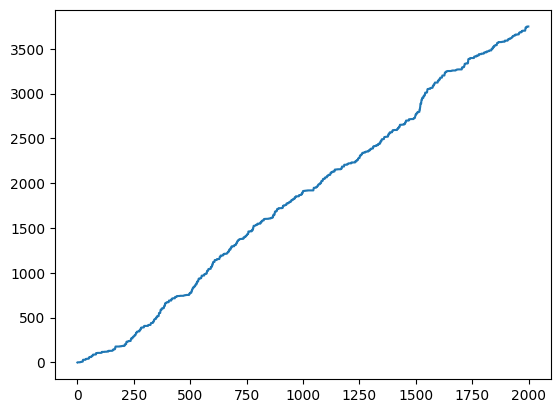

In [20]:
plt.plot(pnls["RAINFOREST_RESIN"])

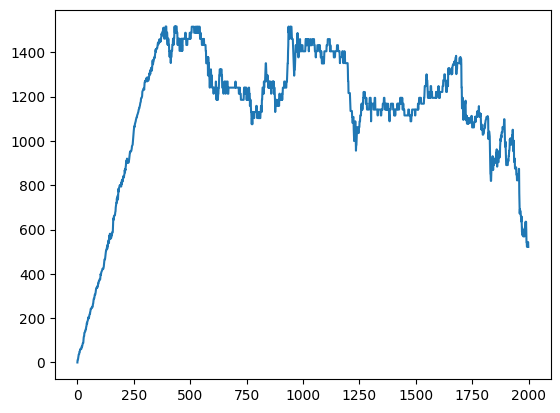

In [31]:
plt.plot(pnls["KELP"])

#### Analyse trades

AMETHYSTSS

In [12]:
trades_df = pd.DataFrame(columns=["timestamp", "buyer", "seller", "price", "quantity"])

In [13]:
for trade in ex.trade_hist["RAINFOREST_RESIN"]:
    if len(trade.seller) > 1:
        row = [trade.timestamp, "", "SUBMISSION", trade.price, trade.quantity]

    elif len(trade.buyer) > 1:
        row = [trade.timestamp, "SUBMISSION", "", trade.price, trade.quantity]

    trades_df.loc[len(trades_df)] = row

In [14]:
trades_df

,timestamp,buyer,seller,price,quantity
0,0,,SUBMISSION,10002,1
1,0,,SUBMISSION,10002,1
2,1200,SUBMISSION,,9998,1
3,1300,,SUBMISSION,10002,1
4,1800,,SUBMISSION,10002,1
5,2000,SUBMISSION,,9998,1
6,3600,SUBMISSION,,9998,4
7,3700,,SUBMISSION,10002,1
8,4300,SUBMISSION,,9998,1
9,6500,SUBMISSION,,9998,1


STARFRUIT

In [32]:
trades = ex.trade_hist["KELP"]

In [33]:
# process log
buy_time, buy_price, buy_qt, sell_time, sell_price, sell_qt = [], [], [], [], [], []
for trade in ex.trade_hist["KELP"]:
    if len(trade.seller) > 1:
        sell_time.append(trade.timestamp)
        sell_price.append(trade.price)
        sell_qt.append(trade.quantity)
    elif len(trade.buyer) > 1:
        buy_time.append(trade.timestamp)
        buy_price.append(trade.price)
        buy_qt.append(trade.quantity)

In [34]:
print("average buy price: ", np.array(buy_price).mean(),
      "\naverage sell price: ", np.array(sell_price).mean())

average buy price:  2022.16091954023 
average sell price:  2023.1946107784431


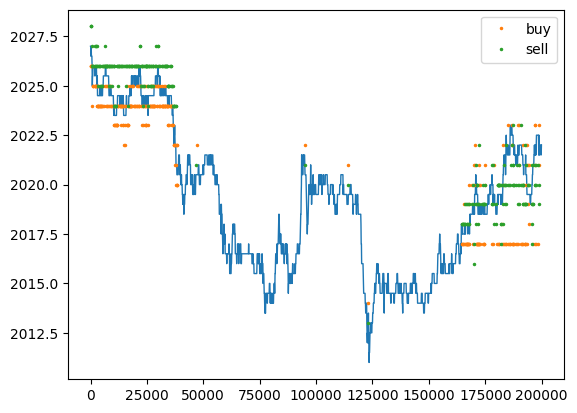

In [35]:
plt.plot(timestamps, mp.loc[mp["product"]=="KELP"]["mid_price"], lw=1)
plt.plot(buy_time, buy_price, lw=0, marker='.', ms=3, label="buy")
plt.plot(sell_time, sell_price, lw=0, marker='.', ms=3, label="sell")
plt.legend()
plt.show()

The problem is that the algo doesn't manage to exit the long position in one go, so it tries to sell it again and again until it exits the position, even if the price is not favourable.

One possible fixes: set upper limit for possible loss in a trade; set maximum long position (way below position limit). This might limit the profit

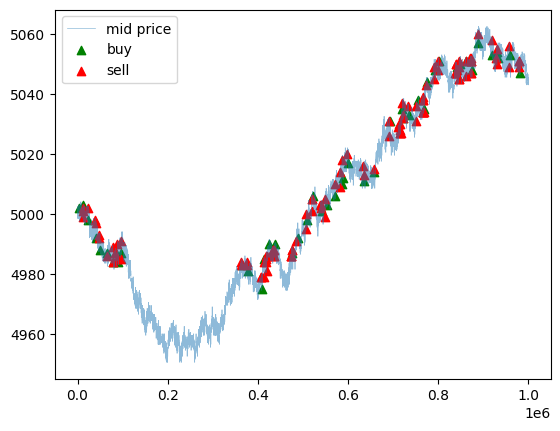

In [ ]:
plt.plot(timestamps, mp.loc[mp["product"]=="STARFRUIT"]["mid_price"], 
         lw=0.5, label="mid price", alpha=0.5)
plt.scatter(buy_time, buy_price, color='g', marker='^', label="buy")
plt.scatter(sell_time, sell_price, color='r', marker='^', label="sell")
plt.legend()
plt.show()

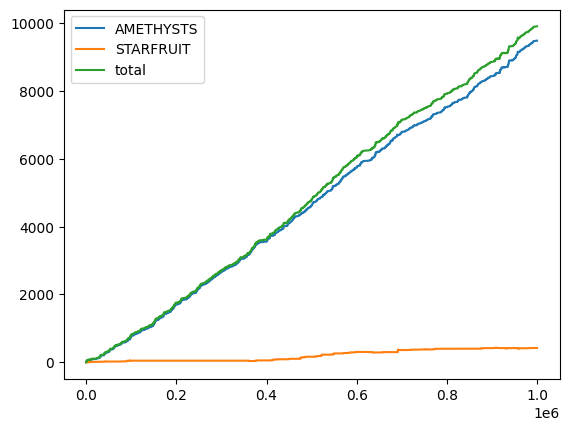

In [ ]:
plt.plot(timestamps, pnls["AMETHYSTS"], label="AMETHYSTS")
plt.plot(timestamps, pnls["STARFRUIT"], label="STARFRUIT")
plt.plot(timestamps, np.array(pnls["STARFRUIT"])+np.array(pnls["AMETHYSTS"]), label="total")
plt.legend()
plt.show()

#### ARIMA on Starfruit

In [ ]:
mp1 = pd.read_csv("data/prices_day_-2.csv", sep=";")
mp2 = pd.read_csv("data/prices_day_-1.csv", sep=";")
mp3 = pd.read_csv("data/prices_day_0.csv", sep=";")
mp4 = pd.read_csv('data/prices_day_1.csv', delimiter=";")
mp5 = pd.read_csv("data/prices_day_2.csv", sep=";")
mp6 = pd.read_csv("data/prices_day_3.csv", sep=";")
mp7 = pd.read_csv("data/prices_day_4.csv", sep=";")
mp8 = pd.read_csv("data/prices_day_5.csv", sep=";")

In [ ]:
mp = pd.concat([mp1, mp2, mp3, mp4, mp5, mp6, mp7, mp8], axis=0).reset_index(drop=True)
st = mp.loc[mp["product"] == "STARFRUIT"].reset_index(drop=True)

In [ ]:
# true_mp =  get_midprice_mm(st)
true_mp = np.loadtxt("data/starfruit.txt")

<Axes: >

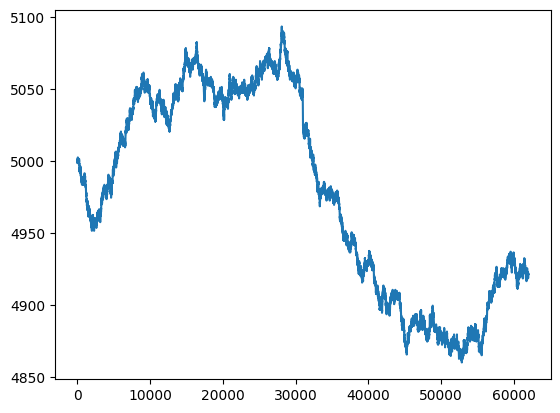

In [ ]:
st["mid_price"] = true_mp
st["mid_price"].plot()

ARIMA on true_mp

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
def is_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] > 0.05:
        return False
    else:
        return True

def fit_arima(series, order=(1,1,1), steps=10):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return model_fit, forecast